In [1]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk

from matplotlib.dates import DateFormatter
from wordcloud import WordCloud

In [2]:
# Loading the data in Python Environment.
df = pd.read_csv("Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### Exploratory Data Analysis -

In [3]:
df.shape

(2224, 11)

In [4]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

-  We can see there are no missing values in the dataset.

In [5]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


- The columns *Date* and *Date_month_year* are of object data type.
- We need to convert these to pandas **datetime** format.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

###  Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [8]:
df['Date_month_year'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-10-05      7
2015-05-24      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

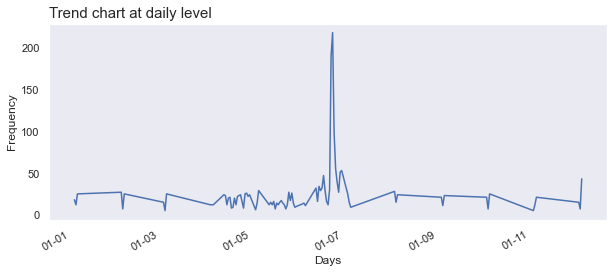

In [9]:
fig,ax = plt.subplots(figsize=(10,4))
df['Date_month_year'].value_counts().plot(kind='line')
plt.grid()
myFmt = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(myFmt)
plt.title('Trend chart at daily level', loc='left', fontsize=15)
plt.xlabel('Days'), plt.ylabel('Frequency')
plt.show()

- There seems to be **huge** disperency in the last days of June.
- There were **highest** complaints on *2015-06-24*.

In [10]:
# Month-wise Complaints.
monthly_complains = df.set_index(df['Date_month_year'])\
                                 .groupby(pd.Grouper(freq="M"))\
                                 .size()
monthly_complains

Date_month_year
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

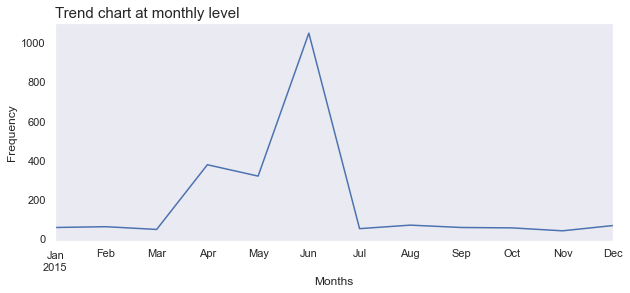

In [11]:
fig,ax = plt.subplots(figsize=(10,4))
monthly_complains.plot(kind='line')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Trend chart at monthly level', loc='left', fontsize=15)
plt.show()

- The highest number of complaints were received in the month of **June**.
- March to June seems to be most busy months.
- The lowest complaints were received in the month of **November**.

### Provide a table with the frequency of complaint types

Let's see the column -

In [12]:
df['Customer Complaint']

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

- The column doesn't contain complaint type.
- Instead, they are statements describing the complains.
- We have to do little bit of text mining.

In [13]:
# Combining all the statements.
text = " ".join(df['Customer Complaint'])
text[:100]

'Comcast Cable Internet Speeds Payment disappear - service got disconnected Speed and Service Comcast'

In [14]:
# Converting every word to Lower-case.
text = text.lower()
text[:100]

'comcast cable internet speeds payment disappear - service got disconnected speed and service comcast'

In [15]:
# Splitting the text to get a list of individual words.
text = text.split(" ")
print(text[:10])

['comcast', 'cable', 'internet', 'speeds', 'payment', 'disappear', '-', 'service', 'got', 'disconnected']


In [16]:
# Removing unwanted characters or digits
text = [x for x in text if x.isalpha()]
print(text[:15])

['comcast', 'cable', 'internet', 'speeds', 'payment', 'disappear', 'service', 'got', 'disconnected', 'speed', 'and', 'service', 'comcast', 'imposed', 'a']


- *Comcast* is the company name and hence it is mentoned many times.
- We need to remove it.

In [17]:
# Removing comcast word
text = [x for x in text if x != 'comcast']
print(text[:50])

['cable', 'internet', 'speeds', 'payment', 'disappear', 'service', 'got', 'disconnected', 'speed', 'and', 'service', 'imposed', 'a', 'new', 'usage', 'cap', 'of', 'that', 'punishes', 'not', 'working', 'and', 'no', 'service', 'to', 'boot', 'isp', 'charging', 'for', 'arbitrary', 'data', 'limits', 'with', 'overage', 'fees', 'throttling', 'service', 'and', 'unreasonable', 'data', 'caps', 'refuses', 'to', 'help', 'troubleshoot', 'and', 'correct', 'my', 'extended', 'outages']


- We notice some english words like a, with, my etc.
- We need to remove these.

In [18]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words[:100])                 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [19]:
# Removing stop-words from text.
text =[x for x in text if x not in stop_words]
print(text[:100])

['cable', 'internet', 'speeds', 'payment', 'disappear', 'service', 'got', 'disconnected', 'speed', 'service', 'imposed', 'new', 'usage', 'cap', 'punishes', 'working', 'service', 'boot', 'isp', 'charging', 'arbitrary', 'data', 'limits', 'overage', 'fees', 'throttling', 'service', 'unreasonable', 'data', 'caps', 'refuses', 'help', 'troubleshoot', 'correct', 'extended', 'outages', 'raising', 'prices', 'available', 'ask', 'billing', 'service', 'asked', 'disconnected', 'yahoo', 'failure', 'restore', 'email', 'search', 'feature', 'violating', 'open', 'internet', 'rules', 'blocking', 'hbo', 'go', 'access', 'sony', 'consoles', 'internet', 'speed', 'internet', 'disconnects', 'every', 'night', 'internet', 'complaint', 'internet', 'availability', 'speed', 'owes', 'claims', 'need', 'return', 'equipment', 'never', 'horrible', 'internet', 'service', 'failure', 'provide', 'services', 'billed', 'internet', 'time', 'monopoly', 'horrible', 'cable', 'service', 'customer', 'service', 'speed', 'monopoly', 

-  We notice some words are not in root form.
-  Like- speed and speeds convey the same meaning.
-  We need to lemmatize our words.

In [20]:
lemmatizer = nltk.stem.WordNetLemmatizer()
clean_words = []
for word in text:
    clean_words.append(lemmatizer.lemmatize(word))
print(clean_words[:100])    

['cable', 'internet', 'speed', 'payment', 'disappear', 'service', 'got', 'disconnected', 'speed', 'service', 'imposed', 'new', 'usage', 'cap', 'punishes', 'working', 'service', 'boot', 'isp', 'charging', 'arbitrary', 'data', 'limit', 'overage', 'fee', 'throttling', 'service', 'unreasonable', 'data', 'cap', 'refuse', 'help', 'troubleshoot', 'correct', 'extended', 'outage', 'raising', 'price', 'available', 'ask', 'billing', 'service', 'asked', 'disconnected', 'yahoo', 'failure', 'restore', 'email', 'search', 'feature', 'violating', 'open', 'internet', 'rule', 'blocking', 'hbo', 'go', 'access', 'sony', 'console', 'internet', 'speed', 'internet', 'disconnect', 'every', 'night', 'internet', 'complaint', 'internet', 'availability', 'speed', 'owes', 'claim', 'need', 'return', 'equipment', 'never', 'horrible', 'internet', 'service', 'failure', 'provide', 'service', 'billed', 'internet', 'time', 'monopoly', 'horrible', 'cable', 'service', 'customer', 'service', 'speed', 'monopoly', 'bundling', 

In [21]:
complaints = ' '.join(clean_words)
complaints[:200]

'cable internet speed payment disappear service got disconnected speed service imposed new usage cap punishes working service boot isp charging arbitrary data limit overage fee throttling service unrea'

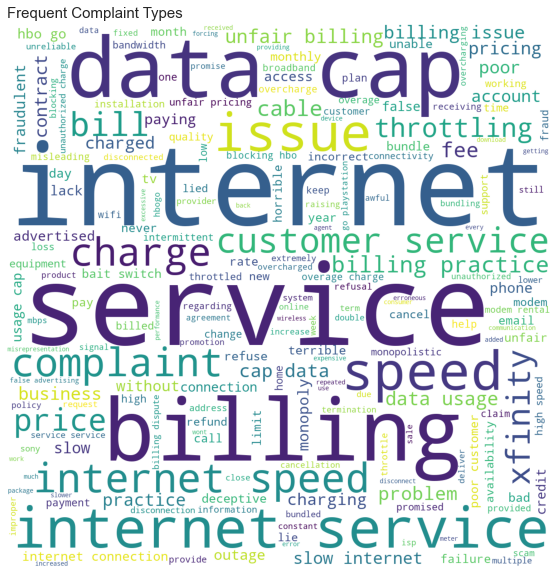

In [22]:
wordcloud = WordCloud(background_color='white',
                     width=1200,
                     height=1200).generate(complaints)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Frequent Complaint Types', loc='left', fontsize=15)
plt.show()

- Most of the complaints were regarding **Internet** issues.
- Folowed by service related, billing and speed issue.

In [23]:
# Creating a helping function.
def match(text,word):
    vals = word.split('|')
    for i in vals:
        if i in text:
            return True
    return False    

In [24]:
def complaint_type(text):
    text = text.lower()
    if match(text,'internet|slow|connection'):
        return "Internet"
    elif match(text,'bill|charge|billing|price|pricing|fee'):
        return 'Billing'
    elif match(text,'speed'):
        return 'Speed'
    elif match(text,'service|services|unfair'):
        return 'Service'
    elif match(text,'data|cap'):
        return 'Data'
    elif match(text,'xfinity'):
        return 'Xfinity'
    elif match(text,'throttling|throttle'):
        return 'Throttle'
    else:
        return 'Others'

In [25]:
df['Complaint Types'] = df['Customer Complaint'].apply(complaint_type)
complaint_type = pd.DataFrame(df['Complaint Types'].value_counts())
# Required table.
complaint_type

,Complaint Types
Internet,571
Others,546
Billing,542
Service,249
Data,193
Speed,59
Xfinity,48
Throttle,16


- **Internet** is top among complaint types.
- Others are also important which company need to look into.

###  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [26]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [27]:
df['Updated Status'] = ['Open' 
                    if x=='Open'or x=='Pending' 
                    else 'Closed' 
                    for x in df['Status']]
df['Updated Status'].unique()

array(['Closed', 'Open'], dtype=object)

### Provide state wise status of complaints in a stacked bar chart.

In [28]:
df['State'].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

- We can see that *District of Columbia* has been mentioned twice.
- This is due to case-sensitivity of word.
- We need to correct it.

In [29]:
df['State'] = df['State'].str.title()
df['State'].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'Iowa'], dtype=object)

In [30]:
state_complains = df.groupby(['State','Updated Status'])['Ticket #'].count()
state_complains = state_complains.unstack().fillna(0)
state_complains

Updated Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


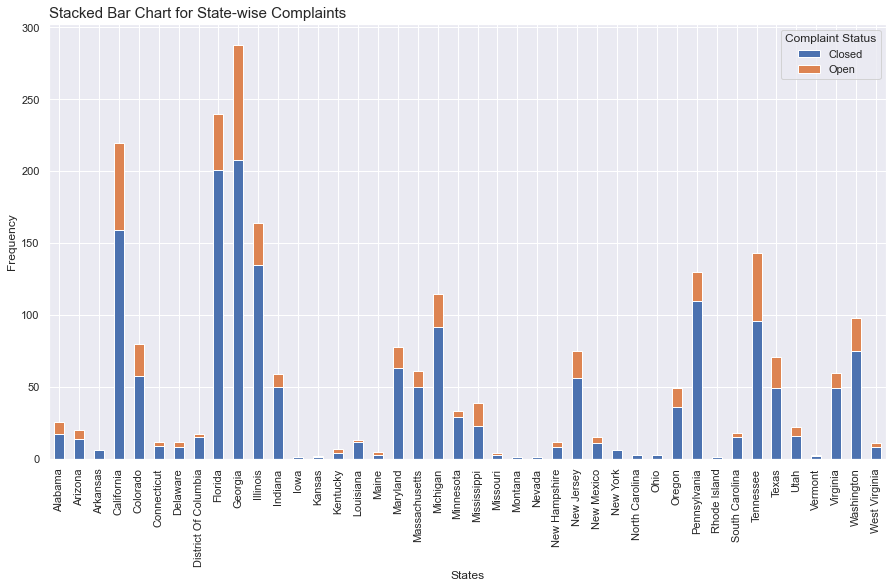

In [31]:
# Visualizing the state-wise complaints.
state_complains.plot(kind='bar',stacked=True,
                     figsize=(15,8))
plt.title('Stacked Bar Chart for State-wise Complaints',
         loc='left', fontsize=15)
plt.xlabel('States')
plt.ylabel('Frequency')
plt.legend(title='Complaint Status', fancybox=True)
plt.show()

### Which state has the maximum complaints ?

In [32]:
state_complains['Total'] = state_complains['Open'] + state_complains['Closed']
state_complains.sort_values(by='Total',ascending=False).iloc[0]

Updated Status
Closed    208.0
Open       80.0
Total     288.0
Name: Georgia, dtype: float64

 - **Georgia** has the maximum complaints.
 - There are total 288 complaints out of which 80 is still open.

### Which state has the highest percentage of unresolved complaints ?

In [33]:
state_complains['% unresolved'] = (state_complains['Open'] / 
                                  state_complains['Total']) * 100
state_complains.sort_values(by='% unresolved',ascending=False).iloc[0]

Updated Status
Closed           1.0
Open             1.0
Total            2.0
% unresolved    50.0
Name: Kansas, dtype: float64

- **Kansas** has the highest percentage of unresolved complaints.
- Though, there were only 2 complaints out of which 1 is pending.

### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [34]:
complains_resolved = df.groupby(['Received Via','Updated Status'])['Ticket #'].count()

In [35]:
complains_resolved = pd.DataFrame(complains_resolved.unstack())
complains_resolved ['Total % resolved'] = complains_resolved['Closed'] / complains_resolved['Closed'].sum() * 100
complains_resolved

Updated Status,Closed,Open,Total % resolved
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


- About **50.61 %** complaints were resolved received through *Customer Care Call*.
- About **49.38 %** complaints were resolved received through *Internet*.